# Laboratory work  6
**Линейная Регрессия в sklearn**

Completed: гр.№ 6131-010402D, Griaznov Ilia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore')

**0. Найти и загрузить датасет, подходящий для задачи регрессии.**
    
    Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что 
    обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, 
    при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

## Данные о новорожденных

In [2]:
birth = pd.read_csv('birth.csv')
birth.head(5)

,Sex,Gestation,Weight,Length,Head,Chest,Mother.s.age,type,region
0,female,40,2800,50.0,31.0,30.0,25,r,bz
1,female,38,3250,50.0,36.0,35.3,24,r,bz
2,male,39,3100,50.0,33.0,34.0,17,r,bz
3,male,40,4000,53.0,35.0,36.0,41,r,bz
4,male,40,3800,52.0,34.0,35.0,43,r,bz


In [3]:
100 * birth.isna().sum() / birth.shape[0] #поиск пустых значений

Sex             0.0
Gestation       0.0
Weight          0.0
Length          0.0
Head            0.0
Chest           0.0
Mother.s.age    0.0
type            0.0
region          0.0
dtype: float64

**0.1. Временно удалить категориальные / бинарные признаки, оставив только вещественные**

In [4]:
numeric_columns = birth.select_dtypes(include='number').columns
birth_without_categorical = birth[numeric_columns]
birth_without_categorical.head(3)

,Gestation,Weight,Length,Head,Chest,Mother.s.age
0,40,2800,50.0,31.0,30.0,25
1,38,3250,50.0,36.0,35.3,24
2,39,3100,50.0,33.0,34.0,17


**2 Визуализировать heatmap-матрицу кореллированности признаков. См. [пример.](https://stackoverflow.com/questions/39409866/correlation-heatmap)**

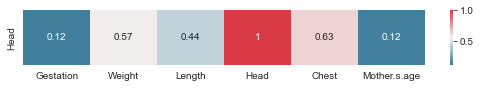

In [5]:
corr = birth_without_categorical.corr(method='spearman')
f, ax = plt.subplots(figsize=(9, 1))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr.sort_values(by=['Head'], ascending=False).head(1), cmap=cmap, annot = True)
plt.show()

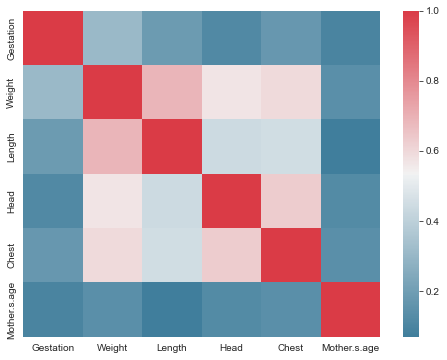

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap=cmap)
plt.show()

---
**Отсортированные признаки по убыванию значения корреляции:**

In [7]:
top_corr = corr['Head'].sort_values(ascending=False).head(10).to_frame()
table_corr = top_corr.style.background_gradient(cmap=cmap)
table_corr

,Head
Head,1.000000
Chest,0.631150
Weight,0.569528
Length,0.437600
Mother.s.age,0.124040
Gestation,0.116350


**3 Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной. См. [пример.](https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h)**

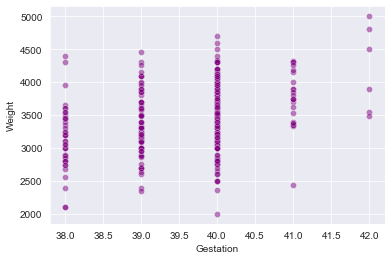

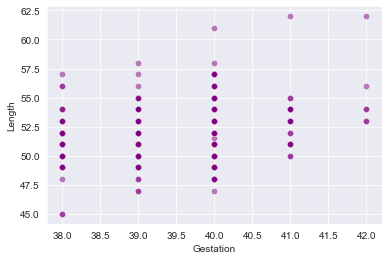

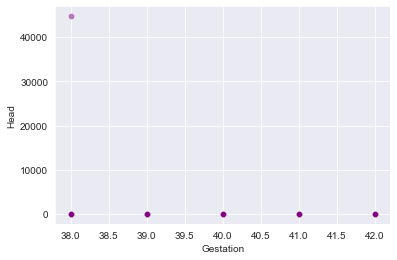

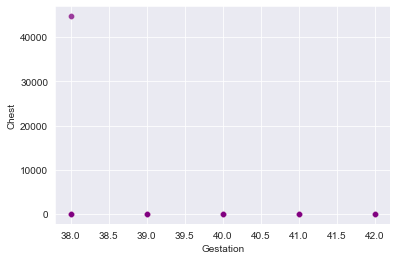

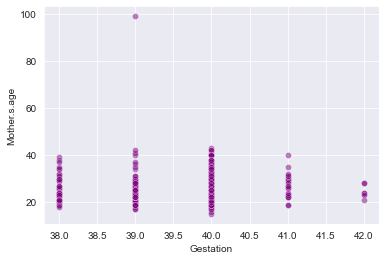

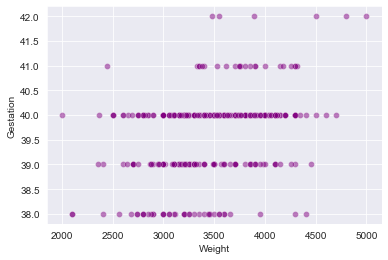

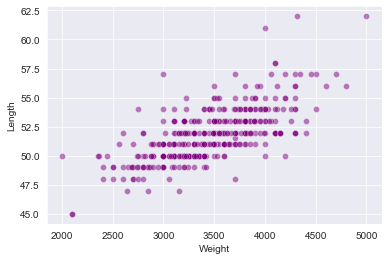

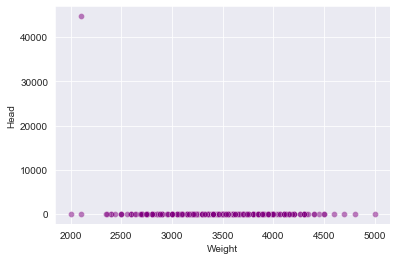

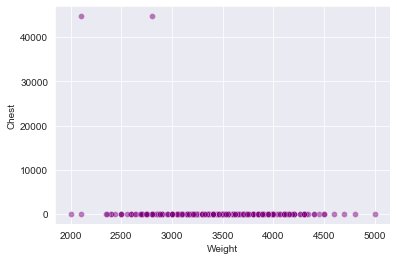

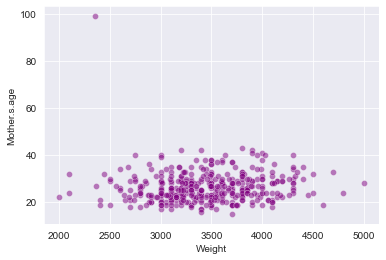

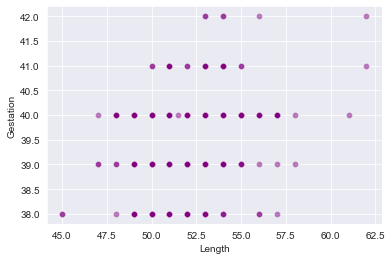

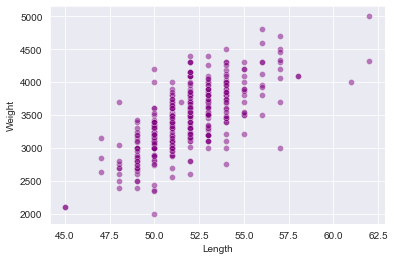

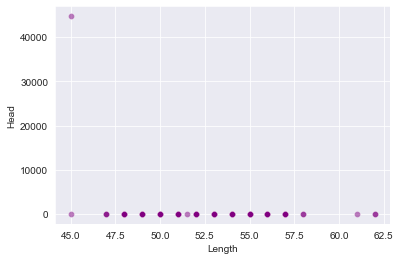

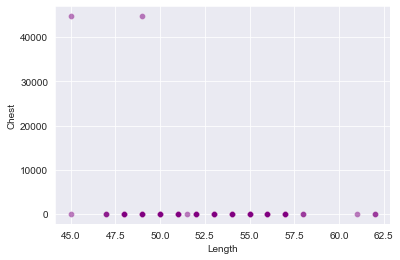

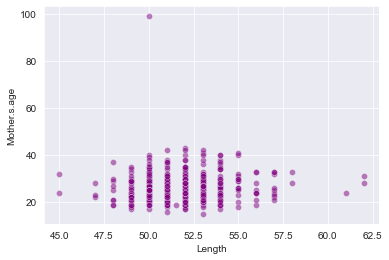

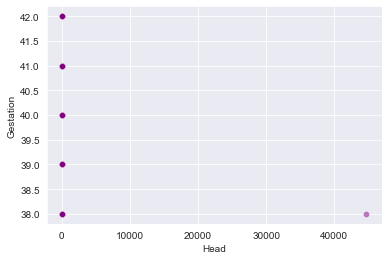

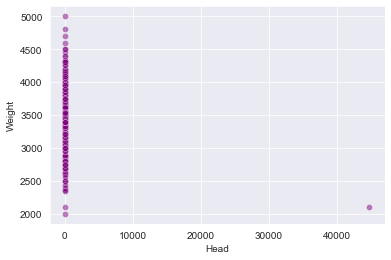

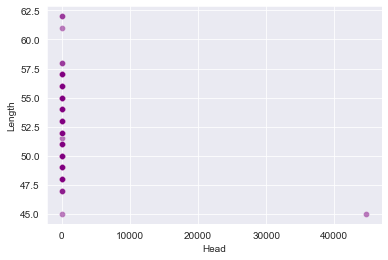

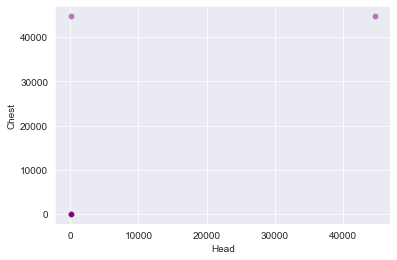

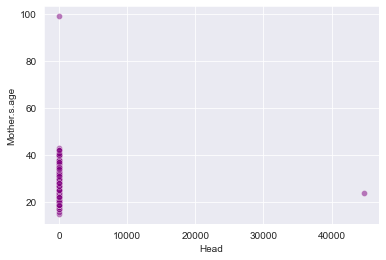

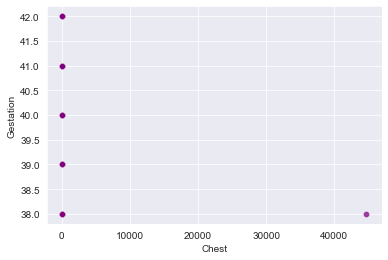

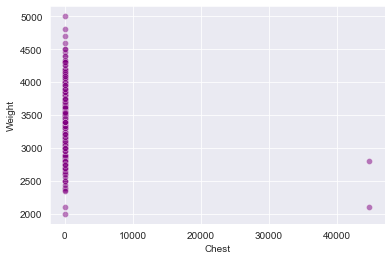

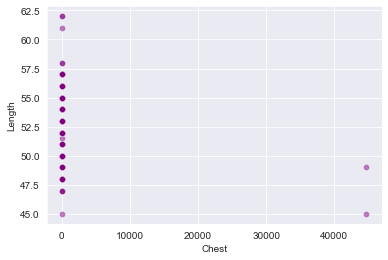

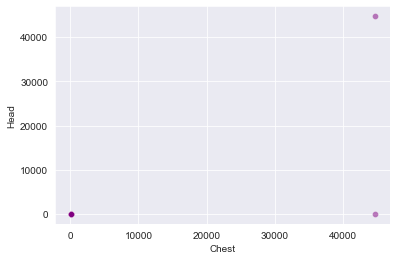

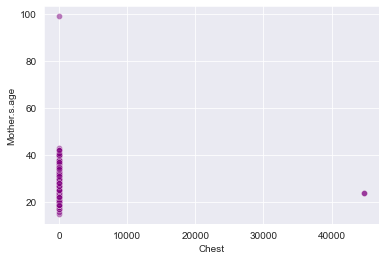

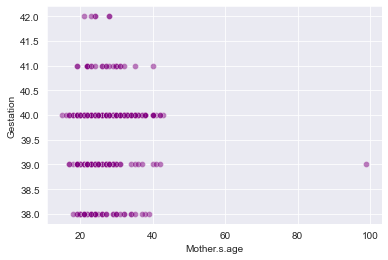

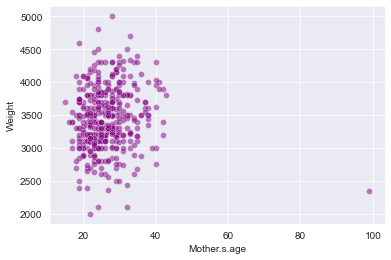

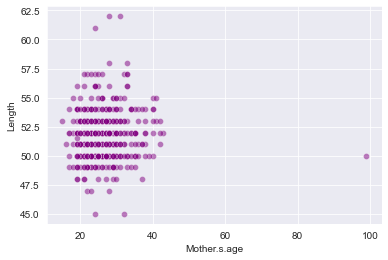

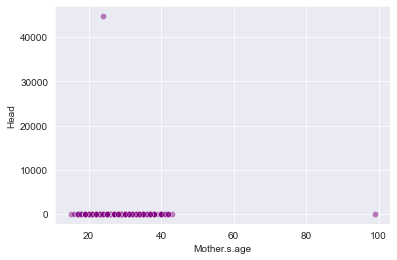

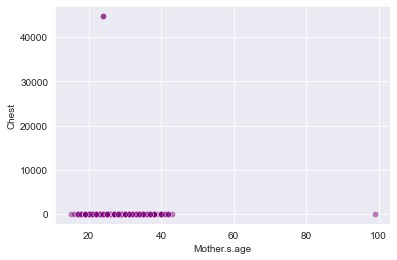

In [8]:
for feature_first in birth_without_categorical.columns.to_list():
  for feature_second in birth_without_categorical.columns.to_list():
    if feature_first != feature_second:
      sns.scatterplot(x = birth_without_categorical[feature_first],
                      y = birth_without_categorical[feature_second],
                      alpha=0.5,
                      color='purple',
                      palette="rocket")
      plt.show()

In [9]:
y = birth_without_categorical["Head"]
X = birth_without_categorical.drop("Head", axis=1)
X.columns

Index(['Gestation', 'Weight', 'Length', 'Chest', 'Mother.s.age'], dtype='object')

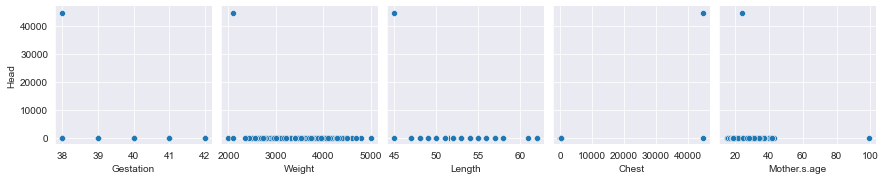

In [10]:
sns.pairplot(data = birth_without_categorical,
             y_vars = ['Head'],
             x_vars = X.columns,
             height=2.5
            )

**4  Разделить набор данных на обучающую и тестовую выборки**

In [11]:
import sklearn.model_selection

In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state = 0
)

**5 Линейная регрессия**

**5.1 Обучить модель линейной регрессии (`LinearRegression`)**

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regression = LinearRegression().fit(X_train, y_train)
print(f'Коэффициенты регрессии: {regression.coef_}\nСвободный член: {regression.intercept_}')

Коэффициенты регрессии: [ 58.56642471  -0.10366086 -49.64236054   0.4944614    0.53851424]
Свободный член: 613.4904502904174


**5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе**

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [16]:
def get_estimations(true_values, predictions):
  mae = mean_absolute_error(true_values, predictions)
  mse =  mean_squared_error(true_values, predictions)
  determ_coef = r2_score(true_values, predictions)
  return mae, mse, determ_coef

In [17]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (258.51209848842194, 3307040.964907206, 0.5013089427459052)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (111.09874019282778, 22362.037427623924, -11577.898617557792)


**5.3 Вывести `model.coef_` и `model.intercept_`**

In [18]:
print(f'Коэффициенты регрессии: {regression.coef_}\nСвободный член: {regression.intercept_}')

Коэффициенты регрессии: [ 58.56642471  -0.10366086 -49.64236054   0.4944614    0.53851424]
Свободный член: 613.4904502904174


In [19]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Length,-49.642361
Weight,-0.103661
Chest,0.494461
Mother.s.age,0.538514
Gestation,58.566425


**5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же, как мы строили графики для feature_importance в теме с деревьями). Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси.**

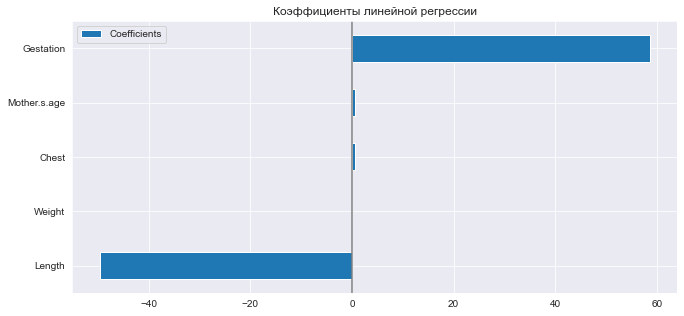

In [20]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты линейной регрессии')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

**6 Модель `Lasso`**

**6.1 Обучить модель регрессии (`Lasso`), с помощью `GridSearchCV` подобрать параметр alpha, дальше работаем с лучшей моделью**

In [21]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [22]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
GridSearchCV(linear_model.Lasso(random_state=42), param_grid=lasso_params).fit(X_train, y_train).best_estimator_,

(Lasso(alpha=0.03, random_state=42),)

In [23]:
lasso_regression = linear_model.Lasso(alpha=0.02, random_state=42).fit(X_train, y_train)

**6.1 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе**

In [24]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, lasso_regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, lasso_regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (258.50022986397533, 3307040.9658033457, 0.5013089426107702)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (111.0862892202066, 22355.524892126738, -11574.526474544919)


**6.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`**

In [25]:
print(f'Коэффициенты регрессии: {lasso_regression.coef_} \nСвободный член: {lasso_regression.intercept_}')

Коэффициенты регрессии: [ 58.52976218  -0.10366363 -49.63455875   0.4944608    0.53816988] 
Свободный член: 614.5583893072316


In [26]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    lasso_regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Length,-49.634559
Weight,-0.103664
Chest,0.494461
Mother.s.age,0.538170
Gestation,58.529762


**6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках**

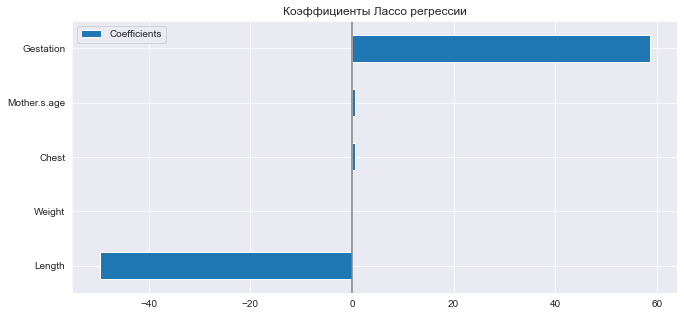

In [27]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты Лассо регрессии')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

**7 Модель Ridge**

**7.1 Обучить модель регрессии (`Ridge`), с помощью `GridSearchCV`  подобрать параметр alpha, дальше работаем с лучшей моделью**

In [28]:
from sklearn.linear_model import Ridge

In [29]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
GridSearchCV(Ridge(random_state=42), param_grid=ridge_params).fit(X_train, y_train).best_estimator_,

(Ridge(alpha=500, random_state=42),)

In [30]:
ridge_regression = Ridge(alpha=200, random_state=42).fit(X_train, y_train)

**7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе**

In [31]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, ridge_regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, ridge_regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (247.0874548549173, 3307872.720152699, 0.5011835167511404)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (99.96968273405665, 16646.696794487074, -8618.5372458542)


**7.3 Для лучшей модели вывести model.coef_ и model.intercept_**

In [32]:
print(f'Коэффициенты регрессии: {ridge_regression.coef_}, Свободный член: {ridge_regression.intercept_}')

Коэффициенты регрессии: [ 26.248975    -0.11653709 -39.54314263   0.49407504   0.57432298], Свободный член: 1414.843489016981


In [33]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    ridge_regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Length,-39.543143
Weight,-0.116537
Chest,0.494075
Mother.s.age,0.574323
Gestation,26.248975


**7.4  Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках**

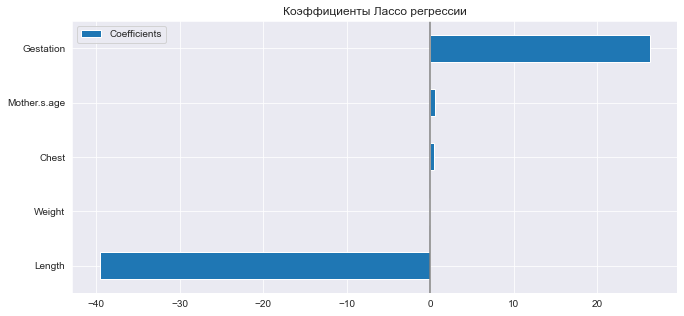

In [34]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты Лассо регрессии')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

**8 Модель `ElasticNet`**

**8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью**

In [35]:
from sklearn.linear_model import ElasticNet

In [36]:
elastic_net_params = {"alpha": [0.0001, 0.001, 0.01, 0.1],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)
                     }
GridSearchCV(ElasticNet(random_state=42), param_grid=elastic_net_params).fit(X_train, y_train).best_estimator_,

(ElasticNet(alpha=0.1, l1_ratio=0.0, random_state=42),)

In [37]:
elastic_net_regression = ElasticNet(alpha=0.1, l1_ratio=0.0, random_state=42).fit(X_train, y_train)

**8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе**

In [38]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train, elastic_net_regression.predict(X_train))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test, elastic_net_regression.predict(X_test))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (255.66965341075323, 3307094.8354742713, 0.501300819239021)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (108.06170239188157, 20823.729804608545, -10781.37423702401)


**8.3 Для лучшей модели вывести model.coef_ и model.intercept_**

In [39]:
print(f'Коэффициенты регрессии: {elastic_net_regression.coef_}, Свободный член: {elastic_net_regression.intercept_}')

Коэффициенты регрессии: [ 49.47482225  -0.10416833 -47.78159835   0.49431661   0.55640597], Свободный член: 878.8015035731436


In [40]:
feature_names = X_train.columns.to_list()

coefs = pd.DataFrame(
    elastic_net_regression.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Length,-47.781598
Weight,-0.104168
Chest,0.494317
Mother.s.age,0.556406
Gestation,49.474822


**8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках**

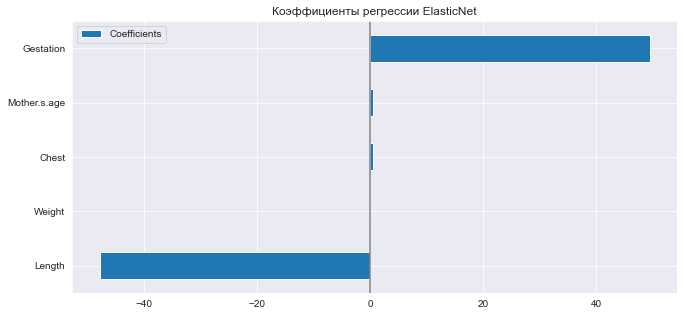

In [41]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты регрессии ElasticNet')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

 **9 Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе**

**Linear:** 
MAE, MSE, R^2: (`0.79`, `1.11`, `0.42`) <br>
**Lasso:** 
MAE, MSE, R^2: (`0.79`, `1.11`, `0.42`) <br>
**Ridge:** 
MAE, MSE, R^2: (`0.79`, `1.13`, `0.41`) <br>
**Elastic NET:** 
MAE, MSE, R^2: (`0.79`, `1.11`, `0.42`)<br>

**Лучшая по МАЕ:**
> Ridge

**Лучшая по МSЕ:**
> Lasso

**Лучшая по R^2:**
> Ridge

**10 Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True ). Обучаем лучшую модель.**

In [42]:
df = birth
df.head(3)

,Sex,Gestation,Weight,Length,Head,Chest,Mother.s.age,type,region
0,female,40,2800,50.0,31.0,30.0,25,r,bz
1,female,38,3250,50.0,36.0,35.3,24,r,bz
2,male,39,3100,50.0,33.0,34.0,17,r,bz


In [43]:
df = pd.concat([df,pd.get_dummies(df['Sex'],drop_first = True)],axis = 1)
df = pd.concat([df,pd.get_dummies(df['type'],drop_first = True)],axis = 1)
df = pd.concat([df,pd.get_dummies(df['region'],drop_first = True)],axis = 1)
df = df.drop(columns=['Sex','type','region'])
df.head(3)

,Gestation,Weight,Length,Head,Chest,Mother.s.age,male,u,rc
0,40,2800,50.0,31.0,30.0,25,0,0,0
1,38,3250,50.0,36.0,35.3,24,0,0,0
2,39,3100,50.0,33.0,34.0,17,1,0,0


**11 Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы**

In [44]:
y1 = df["Head"]
X1 = df.drop("Head", axis=1)

In [45]:
X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(
    X1, y1, random_state = 0
)

In [46]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
GridSearchCV(Ridge(random_state=42), param_grid=ridge_params).fit(X_train1, y_train1).best_estimator_,

(Ridge(alpha=500, random_state=42),)

In [47]:
ridge_regression1 = Ridge(alpha=200, random_state=42).fit(X_train1, y_train1)

In [48]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train1, ridge_regression1.predict(X_train1))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test1, ridge_regression1.predict(X_test1))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (264.79193652731425, 3278652.1268518353, 0.5055898874981107)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (127.55705154591858, 26311.814888378027, -13623.064355608614)


По сравнению с предыдущими значениями качество **ухудшилось**

**12 Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.**

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
data_tr = df.drop("Head",axis = 1)
target = df["Head"]

In [52]:
scaler.fit(data_tr) #нормируем данные
tdtr = scaler.transform(data_tr)

In [53]:
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(
    tdtr, target, random_state = 0
)

In [54]:
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
GridSearchCV(Ridge(random_state=42), param_grid=ridge_params).fit(X_train2, y_train2).best_estimator_,

(Ridge(alpha=500, random_state=42),)

In [55]:
ridge_regression2 = Ridge(alpha=200, random_state=42).fit(X_train2, y_train2)

In [56]:
print('------------- Тренировочная выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_train2, ridge_regression2.predict(X_train2))}')
print('------------- Тестовая выборка -------------')
print(f'MAE, MSE, R^2: {get_estimations(y_test2, ridge_regression2.predict(X_test2))}')

------------- Тренировочная выборка -------------
MAE, MSE, R^2: (336.13041743323197, 3616324.4843555912, 0.45466999060056634)
------------- Тестовая выборка -------------
MAE, MSE, R^2: (215.69982774006013, 69566.46765279153, -36020.0056324405)


По сравнению с предыдущими значениями качество **для MAE, MSE - ухудшилось, для R^2 - улучшилось**

**13 Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12**

In [57]:
feature_names = X_train1.columns.to_list()

coefs = pd.DataFrame(
    ridge_regression2.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs = coefs.sort_values(by='Coefficients')
coefs

,Coefficients
Length,-113.224375
Weight,-87.033377
u,-58.982615
rc,-58.982615
Gestation,-37.998196
Mother.s.age,-8.791021
male,114.129824
Chest,1025.465390


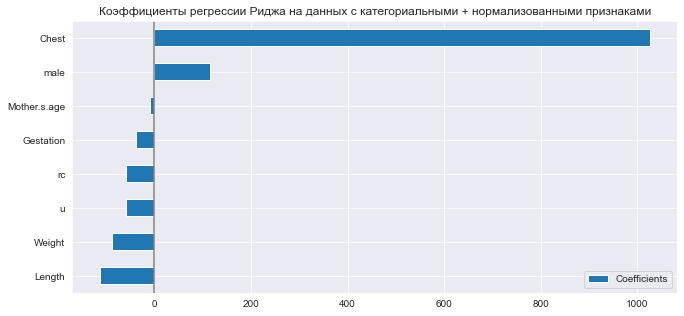

In [58]:
coefs.plot(kind='barh', figsize=(14,  5))
plt.title('Коэффициенты регрессии Риджа на данных с категориальными + нормализованными признаками')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)